#### R<sub>LU</sub> = 𝜎𝜀<sub>S</sub>𝑇<sub>S</sub><sup>4</sup>

𝜎 is 5.67 × 10<sup>-8</sup> J s<sup>-1</sup> m<sup>-2</sup> K<sup>-4</sup><br>
𝜀<sub>S</sub> is Emissivity from MOD11L2<br>
𝑇<sub>S</sub> is AHI LST (℃)

In [1]:
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def daily_to_10min(daily_v):
    tenmin_v = numpy.repeat(daily_v, 24*6)
    return tenmin_v


def calculate_r_lu(epsilon_s, t_s):
    sigma = 5.67e-8
    r_lu = sigma * epsilon_s * t_s**4
    return r_lu

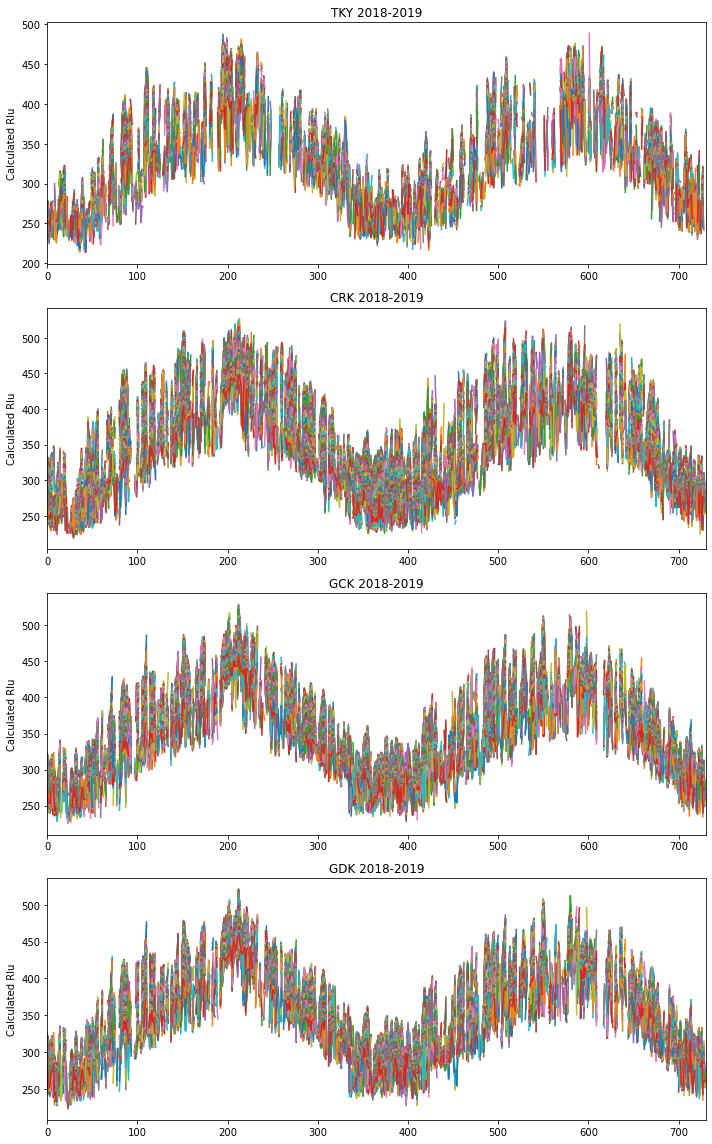

In [3]:
OUTPUT_FOLDER = '/disk2/Data/FluxSite4ET'

site_names = ['TKY', 'CRK', 'GCK', 'GDK']

fig, axes = plt.subplots(len(site_names), 1, figsize=(10, 4 * len(site_names)))    

for i, site_name in enumerate(site_names):
    LST_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_AHI_LST.csv'
    lst_timelist, lst_10min = read_site_csv(LST_SITE_CSV)
    lst_10min_K = lst_10min + 273.15 # ℃ -> K
    EMIS_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_MOD21A1D_Emissivity_BBE.csv'
    emis_timelist, emis_1d = read_site_csv(EMIS_SITE_CSV)
    emis_10min = daily_to_10min(emis_1d)
    r_lu_10min = calculate_r_lu(emis_10min, lst_10min_K)
    
    r_lu_record = r_lu_10min.astype(str)
    r_lu_csv_ = numpy.column_stack((lst_timelist, r_lu_record))
    numpy.savetxt(os.path.join(OUTPUT_FOLDER, site_name+'_RluV002'+'.csv'), r_lu_csv_, delimiter=",", fmt='%s')

    data_day = r_lu_10min.reshape(365 * 2, 24 * 6)
    
    axes[i].plot(numpy.arange(365 * 2), data_day)
    axes[i].set_title(site_name + ' 2018-2019')
    axes[i].set_xlim(0, 365 * 2)
    axes[i].set_ylabel('Calculated Rlu')

plt.tight_layout()
plt.show()

In [ ]:
# noise?
## localtime: 2018-04-21 13:10:00
## localtime: 2019-09-28 15:50:00